In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv('data-export (1)-project.csv')
df.head(6)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
5,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [114]:
df.columns = df.iloc[0]    
df = df.drop(index = 0).reset_index(drop = True)  
df.columns = ["Channel group", "DateHour", "Users", "Session", "Engaged Sessions", "Average engagement time per session", "Engaged sessions per user", "Events per session", "Engagement rate", "Event count"]        
df.head(5)

,Channel group,DateHour,Users,Session,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [115]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format = "%Y%m%d%H",errors='coerce')
numeric_cols = df.columns.drop(["Channel group", "DateHour"])   
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors= 'coerce')
df.head(4)

,Channel group,DateHour,Users,Session,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044


In [116]:
df["Hour"] = df["DateHour"].dt.hour  
sns.set(style = 'whitegrid')
df.head(5)

,Channel group,DateHour,Users,Session,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


Q 1. What patterns or trands can you observe in website sessions and users over time?


Text(0, 0.5, 'Count')

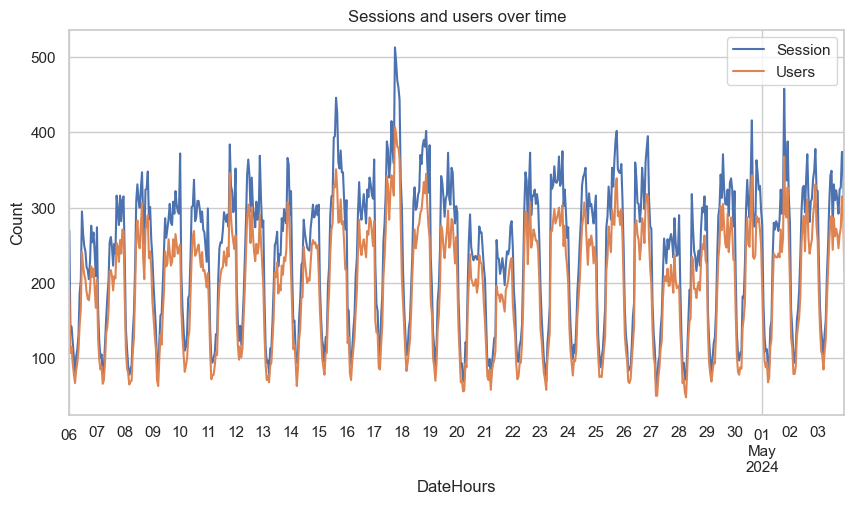

In [117]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Session", "Users"]].sum().plot(ax = plt.gca()) 
plt.title("Sessions and users over time")
plt.xlabel("DateHours")
plt.ylabel("Count") 

Which marketing channel the highest number of users to the website, and how can we use this insight to improve traffic from other sources?


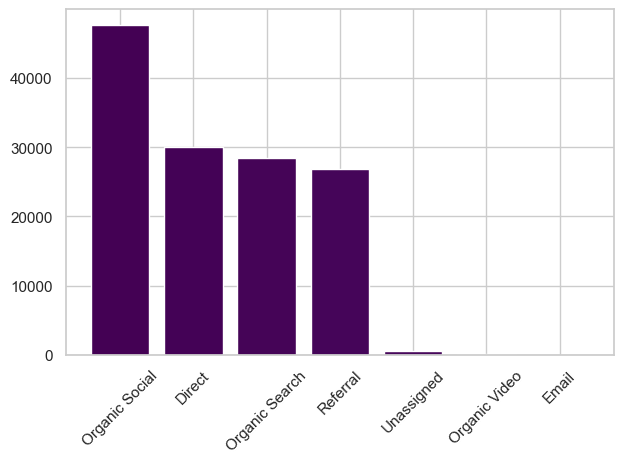

In [63]:
grouped = df.groupby("Channel group")["Users"].sum().sort_values(ascending=False)
plt.bar(grouped.index, grouped.values, color=plt.cm.viridis(range(len(grouped))))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Which channel has the highestaverage engagement time, and what does thet tell us about users behavior and content effectiveness

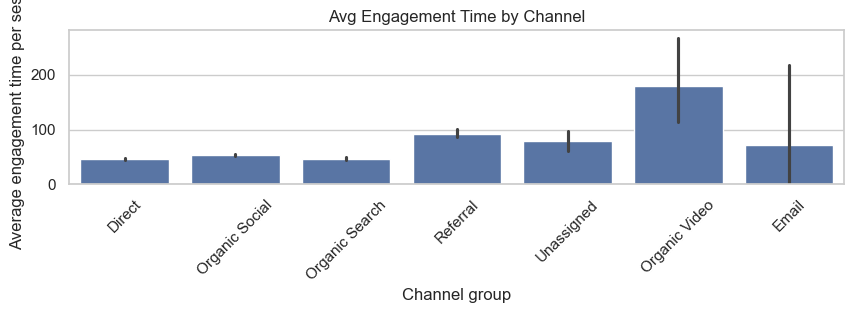

In [67]:
plt.figure(figsize = (10,2))
sns.barplot(data = df, x = "Channel group", y = "Average engagement time per session", estimator = np.mean)
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation = 45)
plt.show()           
           

Q.4 how does engagement rate vary across different traffic channels

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Organic Social'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral'),
  Text(4, 0, 'Unassigned'),
  Text(5, 0, 'Organic Video'),
  Text(6, 0, 'Email')])

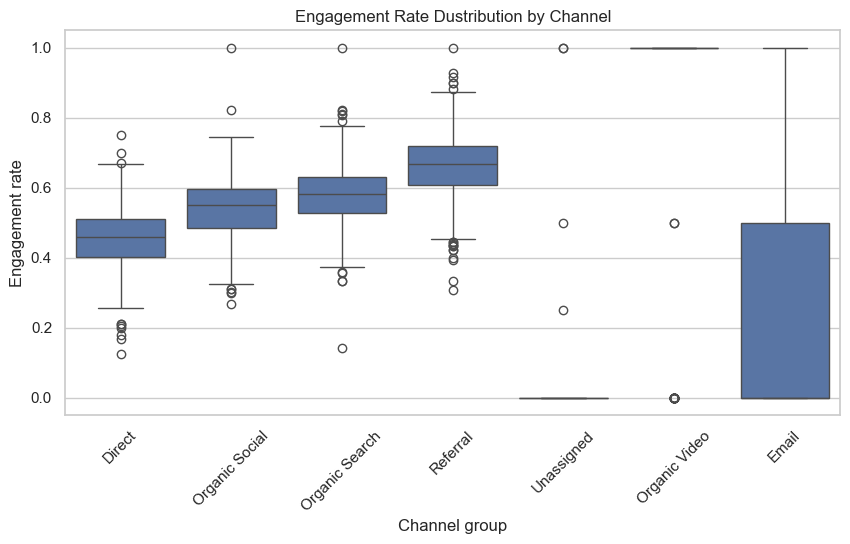

In [66]:
plt.figure(figsize =(10,5))
sns.boxplot(data = df, x = "Channel group", y = "Engagement rate")
plt.title("Engagement Rate Dustribution by Channel")
plt.xticks(rotation = 45 )

Which channels are drivibg more engagwd sessions compared to no-engaged ones and what strategies can improve engagement in underperforming channels 

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Email'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Organic Social'),
  Text(4, 0, 'Organic Video'),
  Text(5, 0, 'Referral'),
  Text(6, 0, 'Unassigned')])

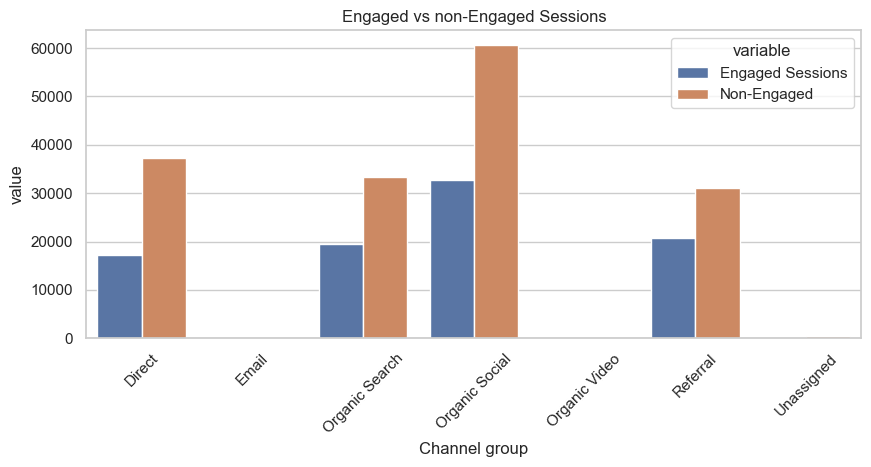

In [87]:
# Engaged vs non engaged session
session_df = df.groupby("Channel group")[["Session","Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Session"]
session_df_melted = session_df.melt(id_vars = "Channel group", value_vars = ["Engaged Sessions", "Non-Engaged"])

plt.figure(figsize = (10,4))
sns.barplot(data = session_df_melted, x = "Channel group", y = "value", hue = "variable")
plt.title("Engaged vs non-Engaged Sessions")
plt.xticks(rotation = 45)

At what hourse of the day does each channel drive the most traffic

Text(117.24999999999999, 0.5, 'Hour by Day')

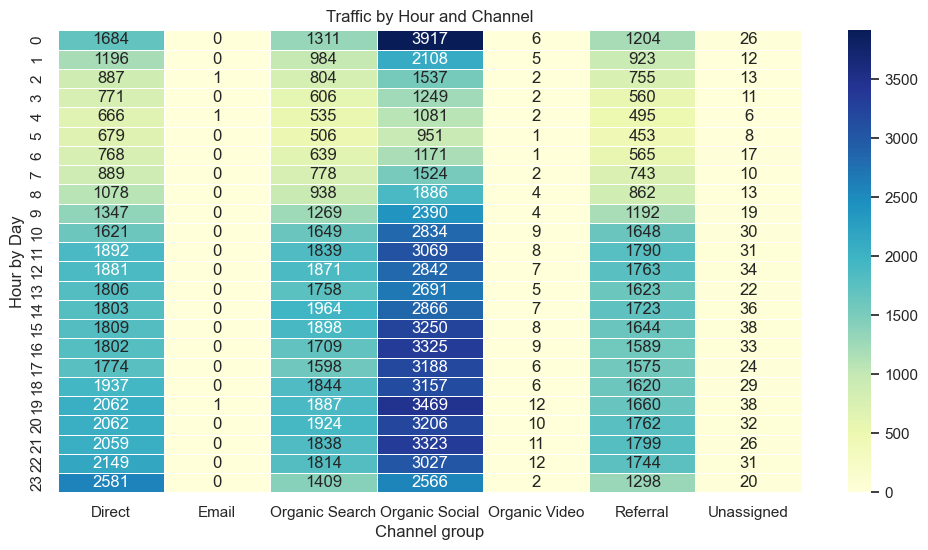

In [103]:
# traffic by hour and channel

heatmap_data = df.groupby(["Hour", "Channel group"])["Session"].sum().unstack().fillna(0).astype(int) 

plt.figure(figsize = (12,6))
sns.heatmap(heatmap_data, annot = True, cmap = "YlGnBu", linewidths = .7, fmt = 'd')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel group")
plt.ylabel("Hour by Day")

In [104]:
# easily see when this most tracffic come to aur channel by different different colours 

At what hours of the day does each channel drive the most traffic?
Is there any correlation bw high tranffic(Session) and high engagement rate over time

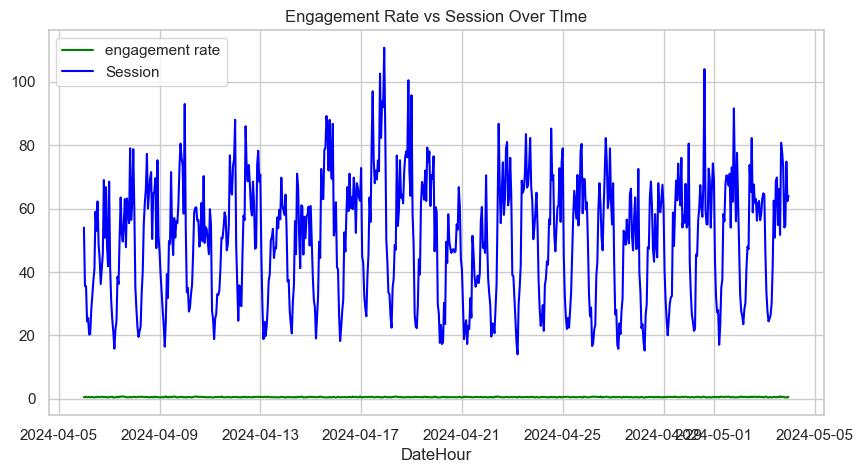

In [110]:
df_plot = df.groupby("DateHour")[["Engagement rate","Session"]].mean().reset_index()

plt.figure(figsize = (10,5))
plt.plot(df_plot["DateHour"],df_plot["Engagement rate"], label = "engagement rate", color = "green")
plt.plot(df_plot["DateHour"],df_plot["Session"], label= "Session", color = "blue")
plt.title("Engagement Rate vs Session Over TIme")

plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()